In [1]:
%cd -q ..
%load_ext autoreload
%autoreload 2

/home/ismael/miniconda3/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [17]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt
import plotnine as pn
from matplotlib import ticker

from utils.common import fct_lump_n, fct_reorder
from utils.formatter import pl_M, pl_pct, fmt_M

### Set up


In [3]:
pn.theme_set(pn.theme_light)

### Helpers


### Comments

- In the original version of the dataset there where duplicate movies, wrong mpaa_rating. The current dataset has only one duplite movie (Tau ming chong)


---


In [4]:
path = "data/568_movie_profit.csv"
df = pd.read_csv(path)
df["release_date"] = pd.to_datetime(df["release_date"])
df["distributor"] = df["distributor"].str.replace("\xa0", " ", regex=False)
df["distributor"] = fct_lump_n(df, "distributor", 5)
df = df.drop_duplicates()
df['decade'] = df['release_date'].dt.year.apply(lambda x: int(x/10)*10)


In [5]:
df = df[df['release_date'].dt.year < 2018]
df = df.reset_index(drop=True)

In [6]:
print(df.shape)
print(df.columns.tolist())

(3344, 9)
['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'distributor', 'mpaa_rating', 'genre', 'decade']


In [7]:
[df['release_date'].min(), df['release_date'].max()]

[Timestamp('1936-02-05 00:00:00'), Timestamp('2017-12-22 00:00:00')]

La distribución del presupuesto de producción es aprox log-normal.
- Cuales son las medianas?

/home/ismael/miniconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 31'. Pick better value with 'binwidth'.


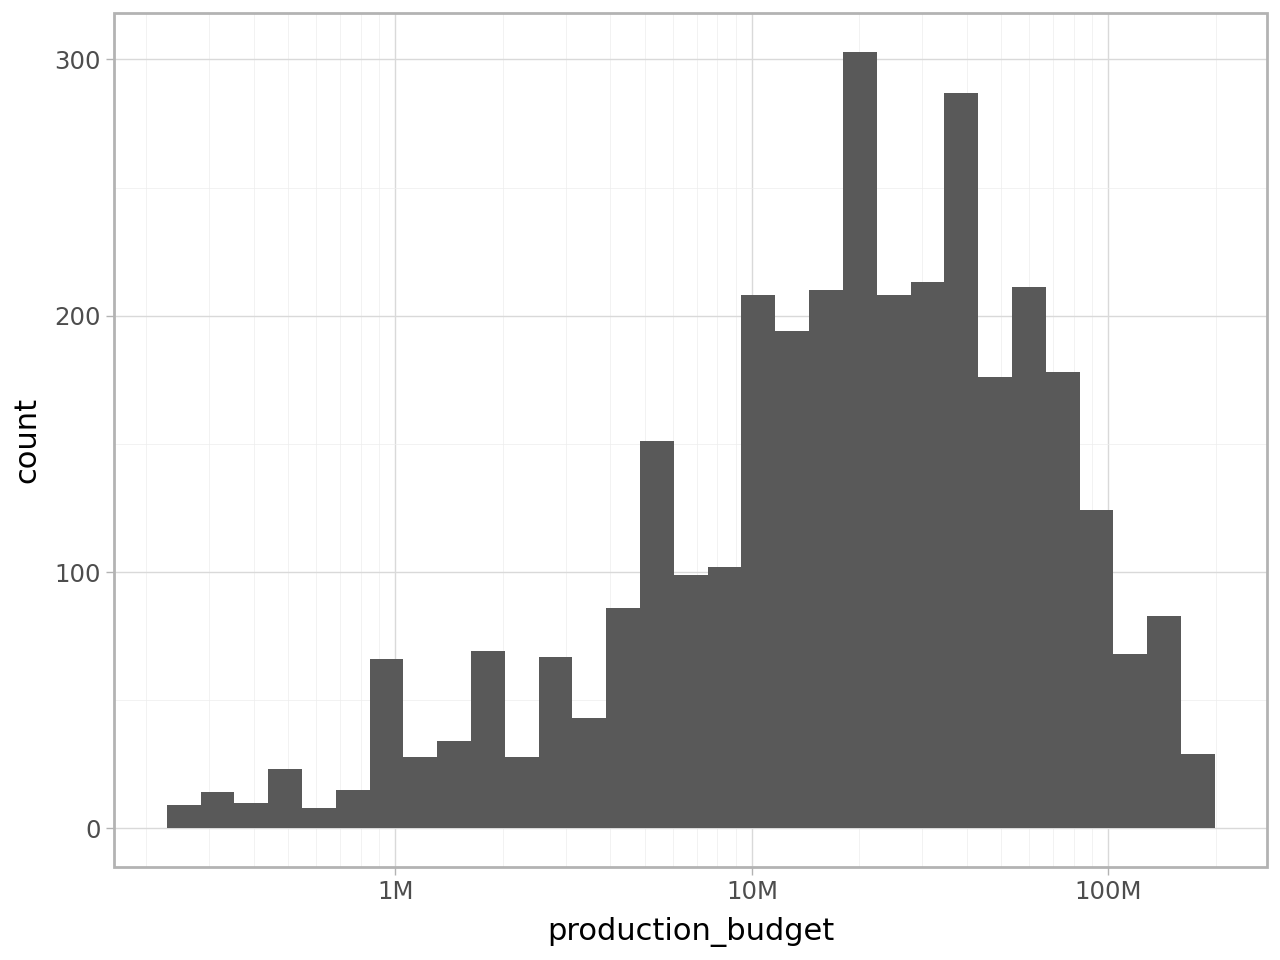

In [8]:
(
    pn.ggplot(df, pn.aes(x="production_budget"))
    + pn.geom_histogram()
    + pn.scale_x_log10(labels=pl_M)
)

Considerations:

- Almost every time you see money, you wanna put it in a log scale. Since they use to be log normal distributed.

Interpretation:

- Production budget kind of log normal distributed.
- It's probably not very lognormal because it has a factor influencing this: ditributer maybe

Questions:

- How to interpret/communicate a log scale histogram or any other plot in that scale?:

* Log scale: small differences in pixels make a lot of differences in real money


In [9]:
df.describe(include=["O"])

,movie,distributor,mpaa_rating,genre
count,3344,3344,3209,3344
unique,3344,6,4,5
top,Evan Almighty,Other,R,Drama
freq,1,1812,1493,1222


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       3344 non-null   datetime64[ns]
 1   movie              3344 non-null   object        
 2   production_budget  3344 non-null   float64       
 3   domestic_gross     3344 non-null   float64       
 4   worldwide_gross    3344 non-null   float64       
 5   distributor        3344 non-null   object        
 6   mpaa_rating        3209 non-null   object        
 7   genre              3344 non-null   object        
 8   decade             3344 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 235.3+ KB


### How many movies per distributor


In [11]:
df['distributor'].value_counts()

distributor
Other                 1812
Warner Bros.           360
Sony Pictures          332
Universal              299
20th Century Fox       279
Paramount Pictures     262
Name: count, dtype: int64

### Distributors

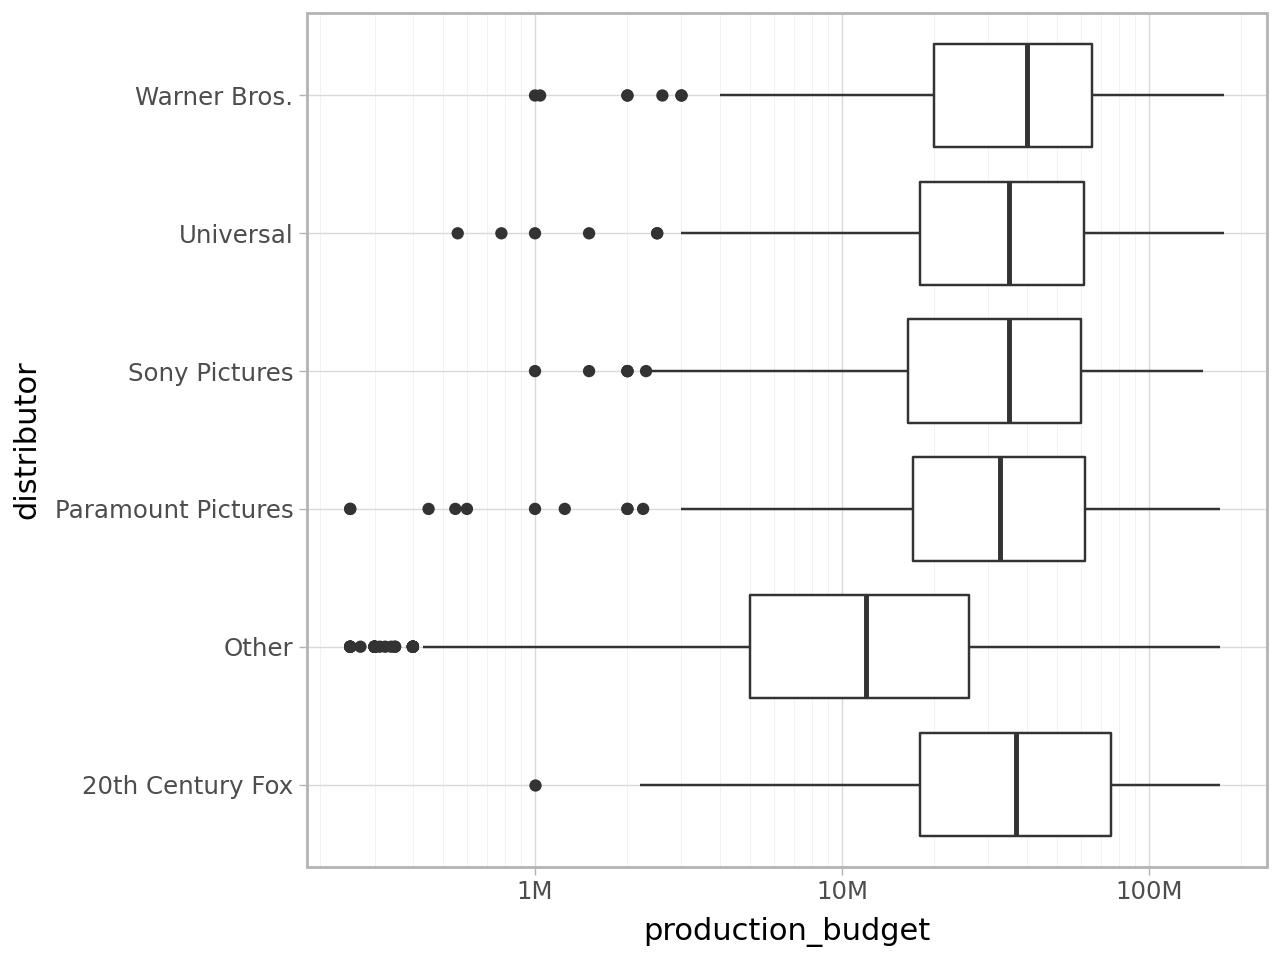

In [14]:
(
    pn.ggplot(df, pn.aes('distributor', "production_budget"))
    + pn.geom_boxplot()
    + pn.coord_flip()
    + pn.scale_y_log10(labels=pl_M)
)

- Major studios, high production budget

/home/ismael/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/ismael/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


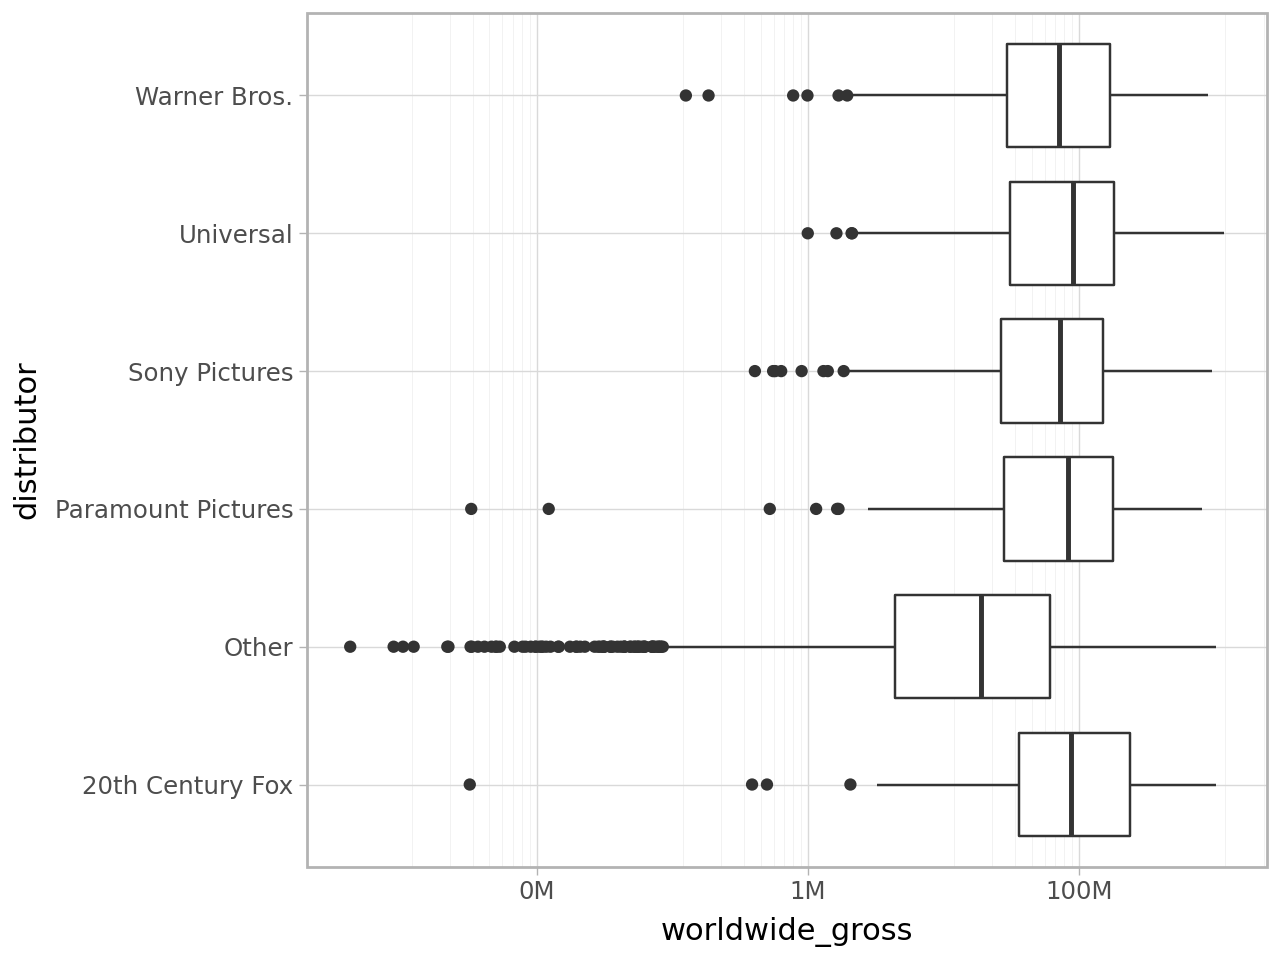

In [15]:
(
    pn.ggplot(df, pn.aes('distributor', "worldwide_gross"))
    + pn.geom_boxplot()
    + pn.coord_flip()
    + pn.scale_y_log10(labels=pl_M)
)

### Genre

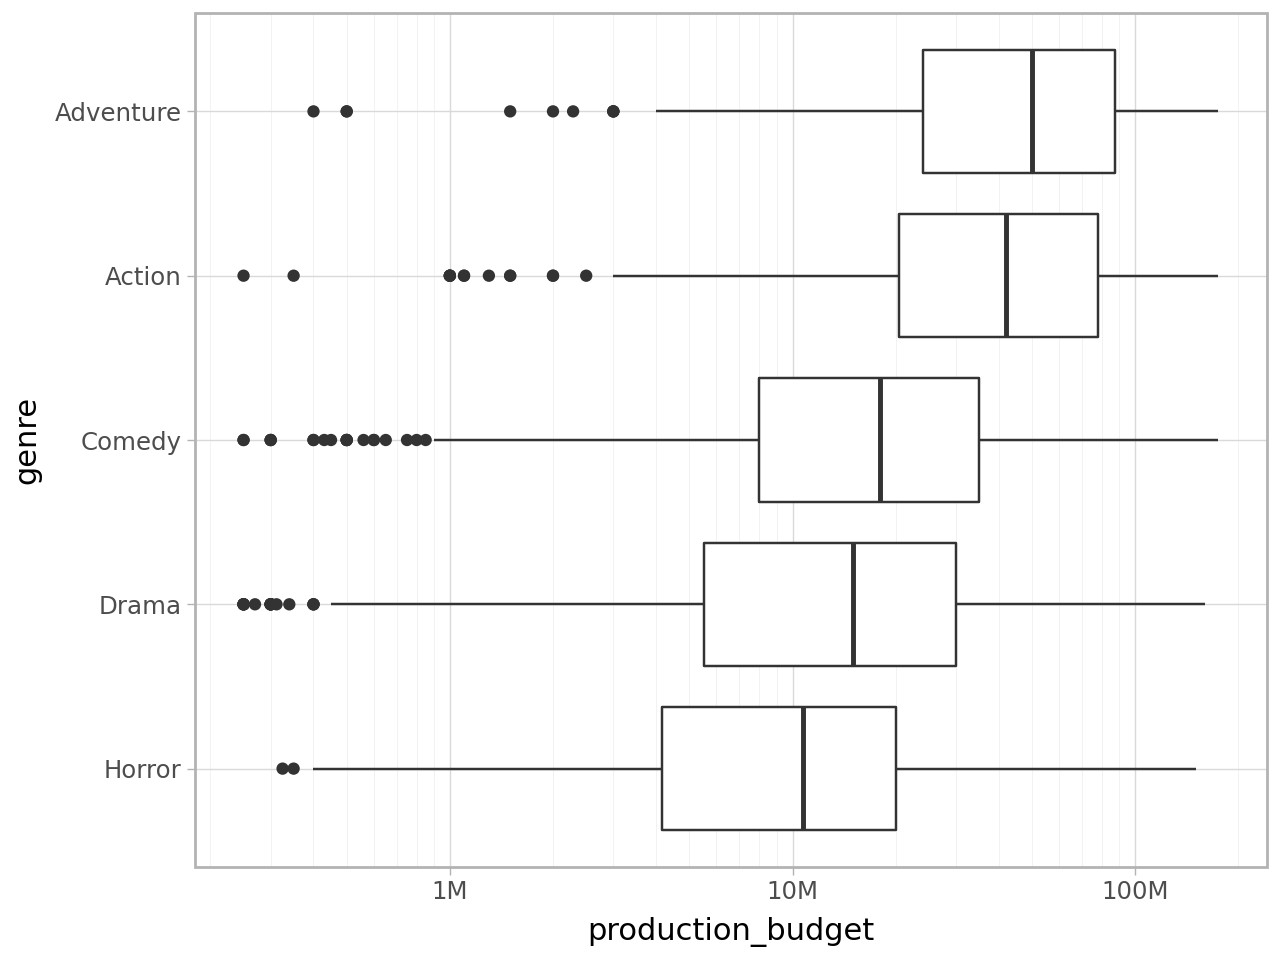

In [18]:
pdf = df.assign(genre=fct_reorder(df, "genre", "production_budget"))

(
    pn.ggplot(pdf, pn.aes('genre', "production_budget"))
    + pn.geom_boxplot()
    + pn.coord_flip()
    + pn.scale_y_log10(labels=pl_M)
)

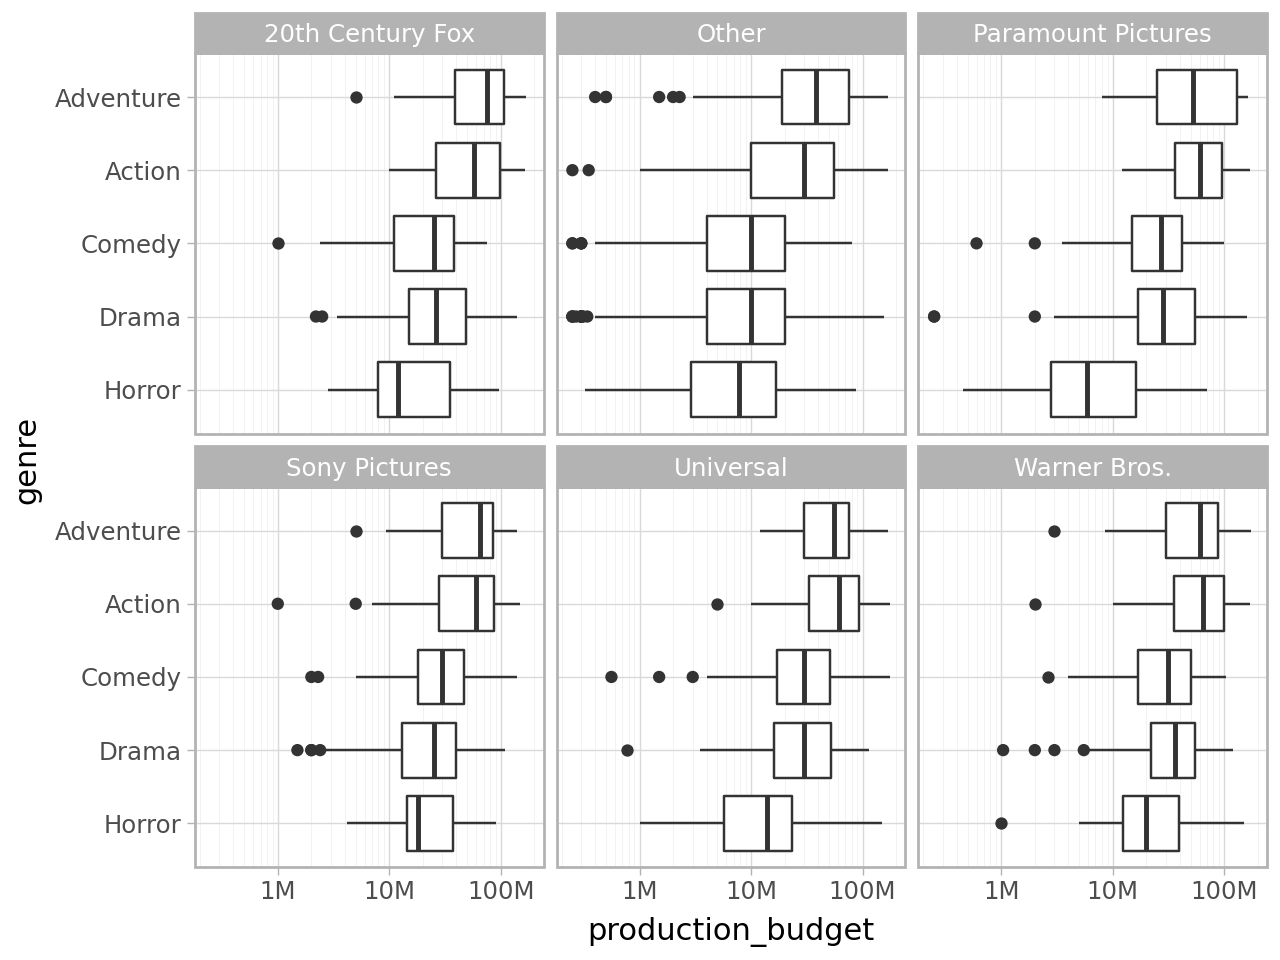

In [19]:
(
    pn.ggplot(pdf, pn.aes('genre', "production_budget"))
    + pn.geom_boxplot()
    + pn.coord_flip()
    + pn.scale_y_log10(labels=pl_M)
    + pn.facet_wrap("~distributor")
)

- Horror usually costs least

/home/ismael/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/ismael/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


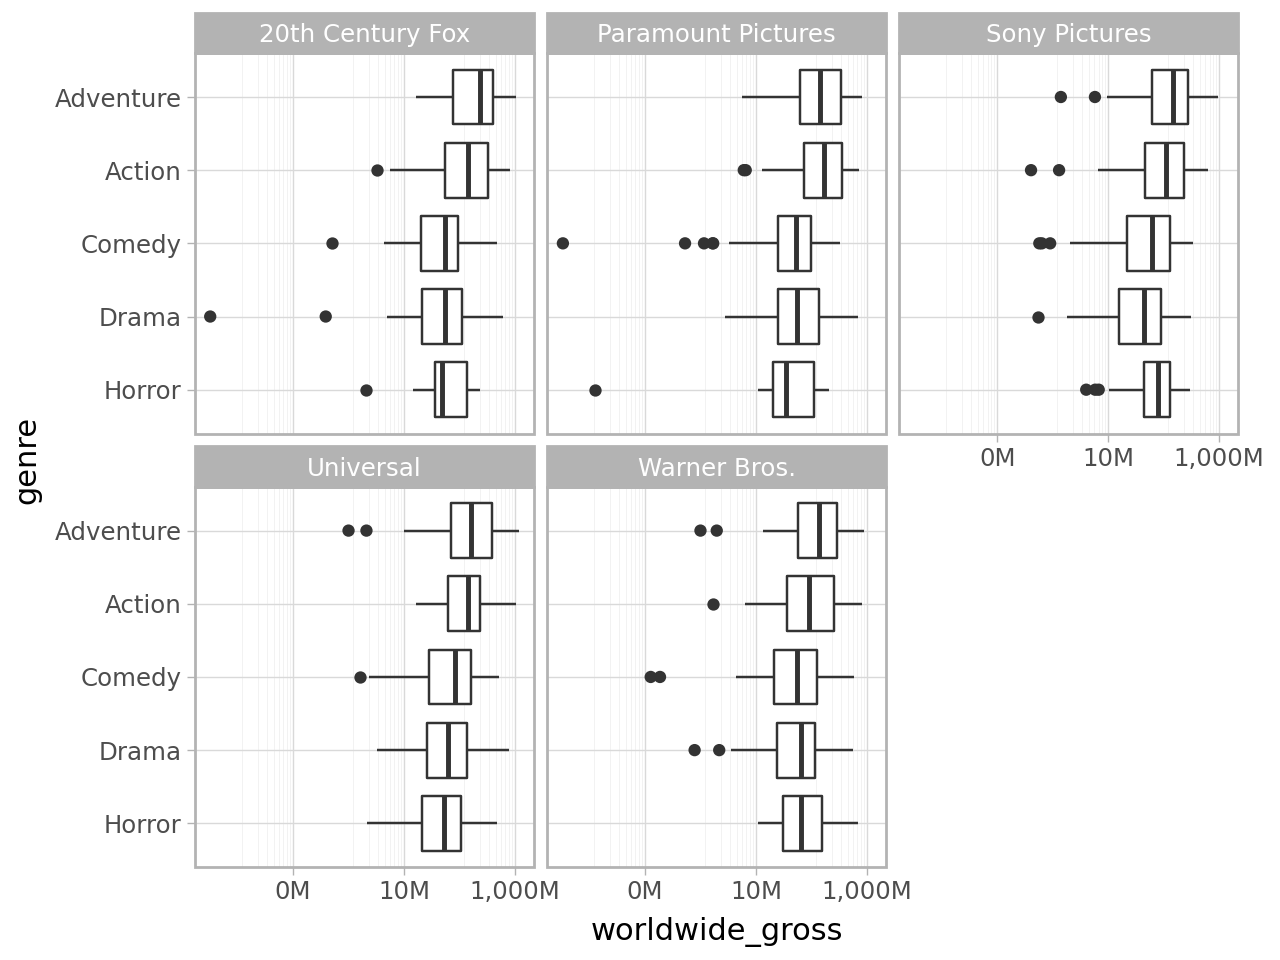

In [21]:
(
    pn.ggplot(pdf[pdf["distributor"] != "Other"], pn.aes('genre', "worldwide_gross"))
    + pn.geom_boxplot()
    + pn.coord_flip()
    + pn.scale_y_log10(labels=pl_M)
    + pn.facet_wrap("~distributor")
)